In [ ]:
import pandas as pd
import numpy as np
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model

seed(1)


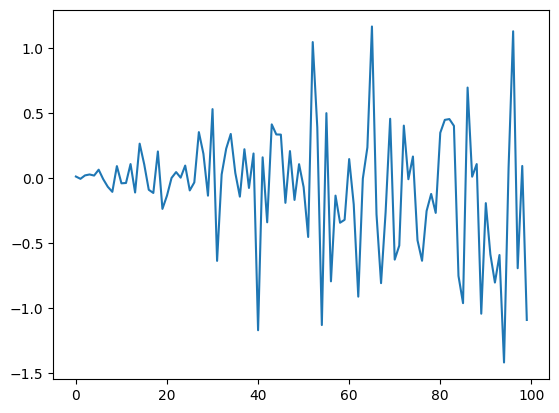

In [10]:
data = [gauss(0, i*0.01) for i in range (1, 100+1)] 
pyplot.plot(data)
pyplot.show()

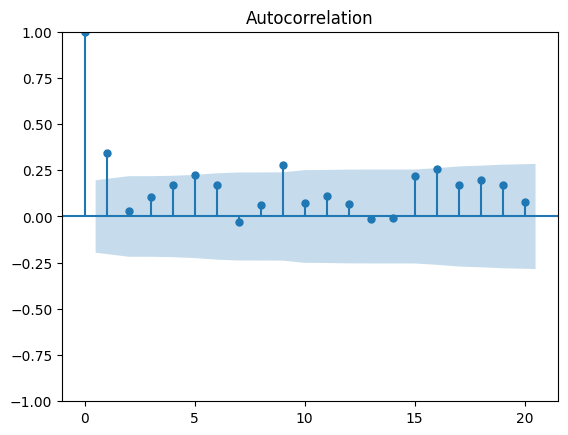

In [16]:
#Ejemplo con un vector de datos 
data = [gauss(0, i*0.01) for i in range (1, 100+1)] 
squared_data = np.array([x**2 for x in data])
plot_acf(squared_data)
pyplot.show()


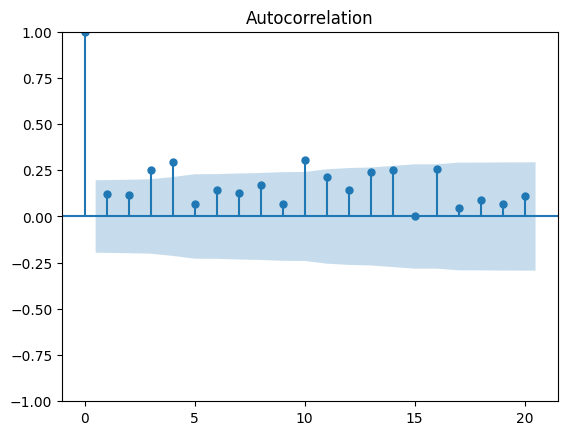

In [15]:
#Ejemplo con una serie de pandas
data = [gauss(0, i*0.01) for i in range (1, 100+1)] 
squared_data = pd.Series([x**2 for x in data])
plot_acf(squared_data)
pyplot.show()


Iteration:      1,   Func. Count:     18,   Neg. LLF: 134.7305952296541
Iteration:      2,   Func. Count:     39,   Neg. LLF: 2489.2941054865155
Iteration:      3,   Func. Count:     57,   Neg. LLF: 230.88929171064623
Iteration:      4,   Func. Count:     75,   Neg. LLF: 70.72140814082813
Iteration:      5,   Func. Count:     93,   Neg. LLF: 80.33643035260307
Iteration:      6,   Func. Count:    111,   Neg. LLF: 49.393187674218126
Iteration:      7,   Func. Count:    129,   Neg. LLF: 49.67746224768544
Iteration:      8,   Func. Count:    147,   Neg. LLF: 44.73818818183774
Iteration:      9,   Func. Count:    165,   Neg. LLF: 43.25924279937481
Iteration:     10,   Func. Count:    182,   Neg. LLF: 47.00570796060526
Iteration:     11,   Func. Count:    201,   Neg. LLF: 43.23651672756704
Iteration:     12,   Func. Count:    218,   Neg. LLF: 43.229780834276305
Iteration:     13,   Func. Count:    235,   Neg. LLF: 43.29154073691627
Iteration:     14,   Func. Count:    253,   Neg. LLF: 43.216

<function matplotlib.pyplot.show(close=None, block=None)>

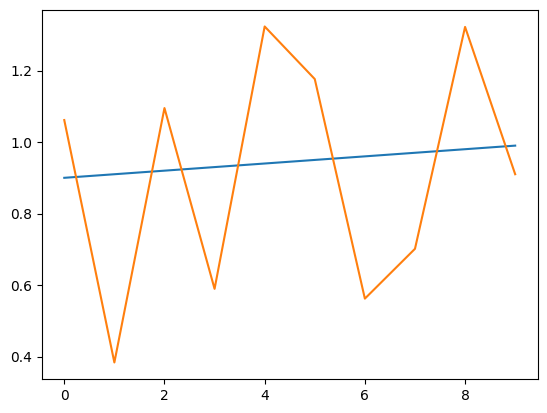

In [25]:
#Modelo Arch
n_test = 10
train, test = data[:-n_test], data[-n_test:]

model = arch_model(train, mean='Zero', vol='ARCH', p=15)
model_fit = model.fit()

yhat = model_fit.forecast(horizon=n_test)

var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test :])

pyplot.plot(yhat.variance.values[-1, :])
pyplot.show

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.85891487995215
Iteration:      2,   Func. Count:     70,   Neg. LLF: 285.04269580485567
Iteration:      3,   Func. Count:    103,   Neg. LLF: 326.6510188946599
Iteration:      4,   Func. Count:    136,   Neg. LLF: 187.43346070350833
Iteration:      5,   Func. Count:    169,   Neg. LLF: 140.26028085433367
Iteration:      6,   Func. Count:    202,   Neg. LLF: 73.08088685439303
Iteration:      7,   Func. Count:    235,   Neg. LLF: 255.51469241971293
Iteration:      8,   Func. Count:    268,   Neg. LLF: 59.91789459170488
Iteration:      9,   Func. Count:    301,   Neg. LLF: 50.761841189987805
Iteration:     10,   Func. Count:    334,   Neg. LLF: 45.04140278160625
Iteration:     11,   Func. Count:    367,   Neg. LLF: 43.15858178912478
Iteration:     12,   Func. Count:    399,   Neg. LLF: 42.60925196761013
Iteration:     13,   Func. Count:    431,   Neg. LLF: 42.53487610344588
Iteration:     14,   Func. Count:    463,   Neg. LLF: 42.5

<function matplotlib.pyplot.show(close=None, block=None)>

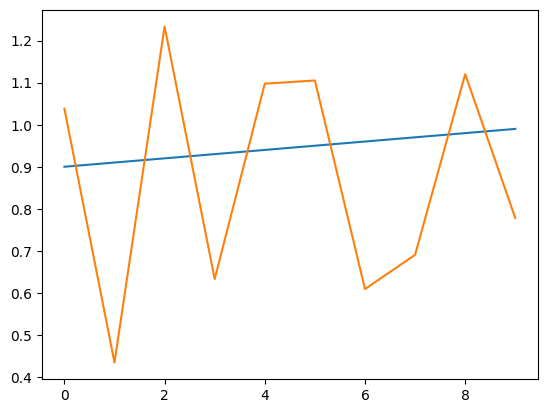

In [26]:
#Para un modelo GARCH
model = arch_model(train, mean = 'Zero', vol = 'GARCH', p=15, q=15 )
model_fit = model.fit()

yhat= model_fit.forecast(horizon=n_test)

var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test :])

pyplot.plot(yhat.variance.values[-1, :])
pyplot.show